In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [3]:
data = pd.read_csv('GOOG.csv')

In [4]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [5]:
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
3808,2019-10-04,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1021092


In [6]:
print(len(data))

3809


<function matplotlib.pyplot.show(close=None, block=None)>

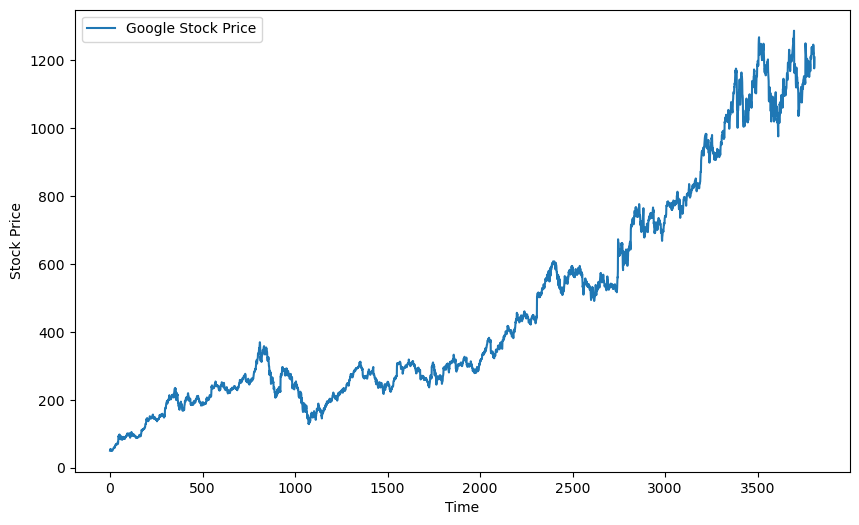

In [7]:
plt.figure(figsize =(10,6))
plt.plot(data['Close'],label="Google Stock Price")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show

In [8]:
scaler=MinMaxScaler()
scaled_data = scaler.fit_transform(np.array(data['Close']).reshape(-1,1))

In [9]:
#split the data into train and test
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [10]:
#function to create dataset with the time step
def create_dataset(data,time_step):
  X,y= [],[]
  for i in range(len(data)-time_step-1):
    X.append(data[i:(i+time_step),0])
    y.append(data[i+time_step,0])
  return np.array(X), np.array(y)

In [11]:
#define the time_step and prepare train and test data
time_step=100
X_train,Y_train = create_dataset(train_data,time_step)
X_test,y_test =  create_dataset(test_data,time_step)

In [12]:
#reshape data for the model(sample,time_step and feature)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [13]:
#prepare model
model = Sequential([
    LSTM(50,return_sequences = True, input_shape = (time_step,1)),
    LSTM(50),
    Dense(1)
]
)

C:\Users\Ruturaj\anaconda3\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(
    optimizer='adam',
    loss = "mean_squared_error"
)

In [15]:
import time
#Measure time
start_time = time.time()

In [16]:
#train the model
model.fit(X_train,Y_train,validation_data=(X_test,y_test),batch_size=64,epochs = 20, verbose =1)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0141 - val_loss: 0.0031
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 1.7419e-04 - val_loss: 7.9488e-04
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 1.4867e-04 - val_loss: 7.4378e-04
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 1.6372e-04 - val_loss: 7.9431e-04
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 1.6050e-04 - val_loss: 7.3919e-04
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 1.3390e-04 - val_loss: 8.6699e-04
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 1.3933e-04 - val_loss: 6.8041e-04
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 1.3373e-04 - val_loss: 6.9036e-04
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 1.3105e-04 - val_loss: 6.5770e-04
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 1.3869e-04 - val_loss: 6.3266e-04
Epoch 11/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 1.5149e-04 - val_

In [17]:
#print training time
training_time = time.time()-start_time
print("Training Time  = ",training_time,"Seconds")

Training Time  =  62.21235489845276 Seconds


In [18]:
#evaluate the model
train_loss = model.evaluate(X_train,Y_train,verbose=0)
test_loss = model.evaluate(X_test,y_test,verbose=0)
print(train_loss)
print(test_loss)

0.0001110315351979807
0.0006821569404564798


In [19]:
#prediction time
start_time=time.time()


In [20]:
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [21]:
prediction_time = time.time()-start_time
print(prediction_time,"Seconds")

2.4853177070617676 Seconds


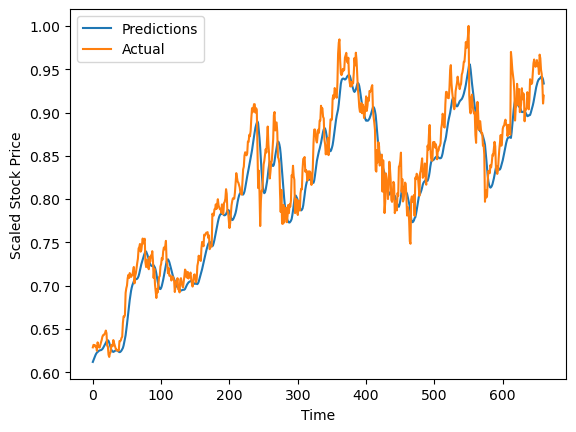

In [22]:
# Plot predictions vs actual
plt.plot(test_prediction, label='Predictions')
plt.plot(y_test, label='Actual')
plt.xlabel('Time')
plt.ylabel('Scaled Stock Price')
plt.legend()
plt.show()